In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sentiment analysis - Project/Data/new_dataset.csv')

# EDA

In [ ]:
df.head()

,reviewText,overall
0,Wonderful tool and perfect for my needs.,5
1,Good Boye quality. FAST shipping!,5
2,"Cute, Cute, Cute.",5
3,Needed 4 different colors for bags and buying ...,5
4,I've found that this type of threader works ea...,5


#### Data exploration

In [ ]:
df.head()

,reviewText,overall
0,Wonderful tool and perfect for my needs.,5
1,Good Boye quality. FAST shipping!,5
2,"Cute, Cute, Cute.",5
3,Needed 4 different colors for bags and buying ...,5
4,I've found that this type of threader works ea...,5


Checking size

In [ ]:
df.size

500000

Showing columns

In [ ]:
df.columns

Index(['reviewText', 'overall'], dtype='object')

Showing number of columns and rows

In [ ]:
df.shape

(250000, 2)

#### Data integrity checks

In [ ]:
df.describe(include='all')

,reviewText,overall
count,250000,250000.000000
unique,249033,NaN
top,good,NaN
freq,8,NaN
mean,NaN,3.000000
std,NaN,1.414216
min,NaN,1.000000
25%,NaN,2.000000
50%,NaN,3.000000
75%,NaN,4.000000


Checking unique values for categorical features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   reviewText  250000 non-null  object
 1   overall     250000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ MB


Some of the rows are duplicates

In [ ]:
any(df.duplicated(subset=df.columns.drop('overall'), keep='first'))

True

#### Checking missing values

Number of missing values in columns with missing values

In [ ]:
df.isna().sum(axis=0)[df.isna().sum(axis=0) > 0]

Series([], dtype: int64)

Missing values ratio

In [ ]:
df.isna().sum(axis=0)[df.isna().sum(axis=0) > 0] / len(df)

Series([], dtype: float64)

#### Checking data balance

In [ ]:
df.overall.value_counts()

5    50000
4    50000
3    50000
2    50000
1    50000
Name: overall, dtype: int64

In [ ]:
df.overall.value_counts()/len(df)

5    0.2
4    0.2
3    0.2
2    0.2
1    0.2
Name: overall, dtype: float64

#### Plotting distribution

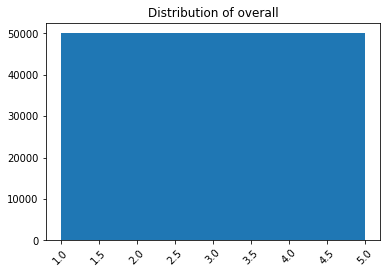

In [ ]:
numerical = df.select_dtypes(include=['int64', 'float64'])
for num in numerical:
    plt.hist(num, data=df, bins=5)
    plt.title(f'Distribution of {num}')
    plt.xticks(rotation=45)
    plt.show()

#### Analyzing the reviews

Checking the length of the reviews

In [ ]:
r_len = df['reviewText'].apply(len)

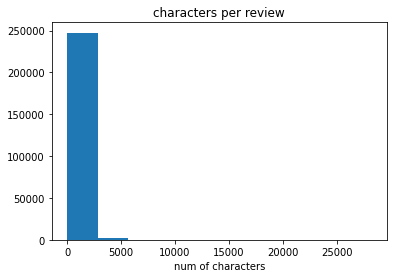

In [ ]:
plt.hist(r_len)
plt.title('characters per review')
plt.xlabel('num of characters')
plt.show()

About 90% of the reviews have character length lower than 1000.

In [ ]:
sum(r_len < 1000) / df.shape[0]

0.91568

101 unique characters

In [ ]:
unique_chars = set(df['reviewText'].str.cat(sep=''))
len(unique_chars)

101

We can see that most of the characters are english letters. In addition to that we also have some special characters.

In [ ]:
unique_chars

{'\x07',
 '\n',
 '\x10',
 '\x14',
 '\x15',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f'}

Checking number of words

In [ ]:
num_of_words = df['reviewText'].apply(lambda s: len(s.split()))

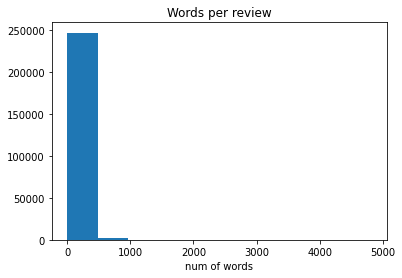

In [ ]:
plt.hist(num_of_words)
plt.title('Words per review')
plt.xlabel('num of words')
plt.show()

About 90% of the reviews have less words than 200.

In [ ]:
sum(num_of_words < 200) / df.shape[0]

0.926008

# Preprocessing 

#### Removing Nan

In [ ]:
df.shape

(250000, 2)

In [ ]:
df = df[df.reviewText.notna()]

In [ ]:
df.shape

(250000, 2)

#### Removing non-unique rows

In [ ]:
df = df.drop_duplicates().copy()

In [ ]:
df.shape

(249580, 2)

#### Checking data balance after dropping non-unique rows

In [ ]:
df.overall.value_counts()

5    49981
4    49934
3    49904
1    49885
2    49876
Name: overall, dtype: int64

In [ ]:
df.overall.value_counts()/len(df)

5    0.200260
4    0.200072
3    0.199952
1    0.199876
2    0.199840
Name: overall, dtype: float64

#### Transforming to 3 labels

In [ ]:
df.overall[df.overall < 3] = 0
df.overall[df.overall == 3] = 1
df.overall[df.overall > 3] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

#### Undersampling

In [ ]:
y = df['overall']

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler() 

df, y = rus.fit_resample(df, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.Series(y).value_counts()

2    49904
1    49904
0    49904
dtype: int64

In [ ]:
pd.Series(y).value_counts()/len(y)

2    0.333333
1    0.333333
0    0.333333
dtype: float64

#### Splitting the data:

In [ ]:
X = pd.DataFrame(df)[0]

Preprocessing the labels so our DL model would understand

In [ ]:
y = tf.keras.utils.to_categorical(y, 3, dtype="float32")

In [ ]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
len(y)

149712

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y) 

#### Cleaning text

In [ ]:
import re
import gensim
from nltk.tokenize.treebank import TreebankWordDetokenizer


def depure_data(data):
    
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)
        
    return data


def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))


def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)


def clean_text(df):
  temp = []
  #Splitting pd.Series to list
  data_to_list = df.values.tolist()
  for i in range(len(data_to_list)):
      temp.append(depure_data(data_to_list[i]))
  data_words = list(sent_to_words(temp))
  data = []
  for i in range(len(data_words)):
      data.append(detokenize(data_words[i]))
  print(data[:5])

  return data

In [ ]:
X_train = clean_text(X_train)
X_test = clean_text(X_test)

['very disappointed in this collar have purchased hamilton collars in the past and they were all of high quality those previous collars lasted for years and would clean up to look like new with just mild soap wash this collar however is coming apart just months after purchase the patterned part on the collar is literally unraveling the dog that it is on is an inside dog and is always walked on leash when outside so she has not had the opportunity to snag it or cause damage that would explain this really liked the color combination as it looked great on my mostly red coated german shepherd but now well have to replace it as it keeps raveling and looks terrible guess like so many companies that start with quality product theyve tried to cut corners and have now lost customer by doing so', 'had two voltos one for pedaltrain nano one for mini at first liked the convenience but came to dislike hunting for the on off button both units failed in less than months so replaced them with one spot

Checking number of words

In [ ]:
num_of_words = [len(s.split()) for s in X_train]

About 93% of the reviews have less words than 200. The number has changed slightly from before.

In [ ]:
sum(np.array(num_of_words) < 200) / len(num_of_words)

0.9312486879520602

#### Tokenizing

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(sequences_train, maxlen=max_len)
X_test = pad_sequences(sequences_test, maxlen=max_len)

print(X_train)

[[   0    0    0 ...   67  463   21]
 [   0    0    0 ... 1152  307 1385]
 [   0    0    0 ...    8   87  752]
 ...
 [   0    0    0 ...  584   26   46]
 [   0    0    0 ...   30  224  158]
 [   0    0    0 ...    2  325  175]]


# Modeling

#### Using single LSTM layer model

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping


model1 = Sequential()
model1.add(layers.Embedding(max_words, 20)) #The embedding layer
model1.add(layers.LSTM(15, dropout=0.5)) #Our LSTM layer
model1.add(layers.Dense(3, activation='softmax'))


model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
               metrics=['accuracy'])

checkpoint1 = ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/Sentiment analysis - Project/saved_models/best_model1.hdf5", 
                              monitor='val_accuracy', 
                              verbose=1, save_best_only=True, mode='auto', 
                              period=1, save_weights_only=False)

es = EarlyStopping(monitor='val_loss', verbose=1, patience=5, restore_best_weights=True)

history = model1.fit(X_train, y_train, epochs=70, 
                     validation_data=(X_test, y_test), use_multiprocessing=True, 
                     callbacks=[checkpoint1, es])

Epoch 1/70
3275/3275 [==============================] - 47s 13ms/step - loss: 0.8721 - accuracy: 0.5818 - val_loss: 0.8169 - val_accuracy: 0.6330

Epoch 00001: val_accuracy improved from -inf to 0.63303, saving model to /content/drive/MyDrive/Colab Notebooks/Sentiment analysis - Project/saved_models/best_model1.hdf5
Epoch 2/70
3275/3275 [==============================] - 41s 12ms/step - loss: 0.7847 - accuracy: 0.6429 - val_loss: 0.7670 - val_accuracy: 0.6508

Epoch 00002: val_accuracy improved from 0.63303 to 0.65080, saving model to /content/drive/MyDrive/Colab Notebooks/Sentiment analysis - Project/saved_models/best_model1.hdf5
Epoch 3/70
3275/3275 [==============================] - 40s 12ms/step - loss: 0.7612 - accuracy: 0.6554 - val_loss: 0.7458 - val_accuracy: 0.6632

Epoch 00003: val_accuracy improved from 0.65080 to 0.66318, saving model to /content/drive/MyDrive/Colab Notebooks/Sentiment analysis - Project/saved_models/best_model1.hdf5
Epoch 4/70
3275/3275 [==================

In [ ]:
test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

1404/1404 - 7s - loss: 0.7058 - accuracy: 0.6824
Model accuracy:  0.6824153065681458


In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test.argmax(axis=1), np.around(y_pred, decimals=0).argmax(axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


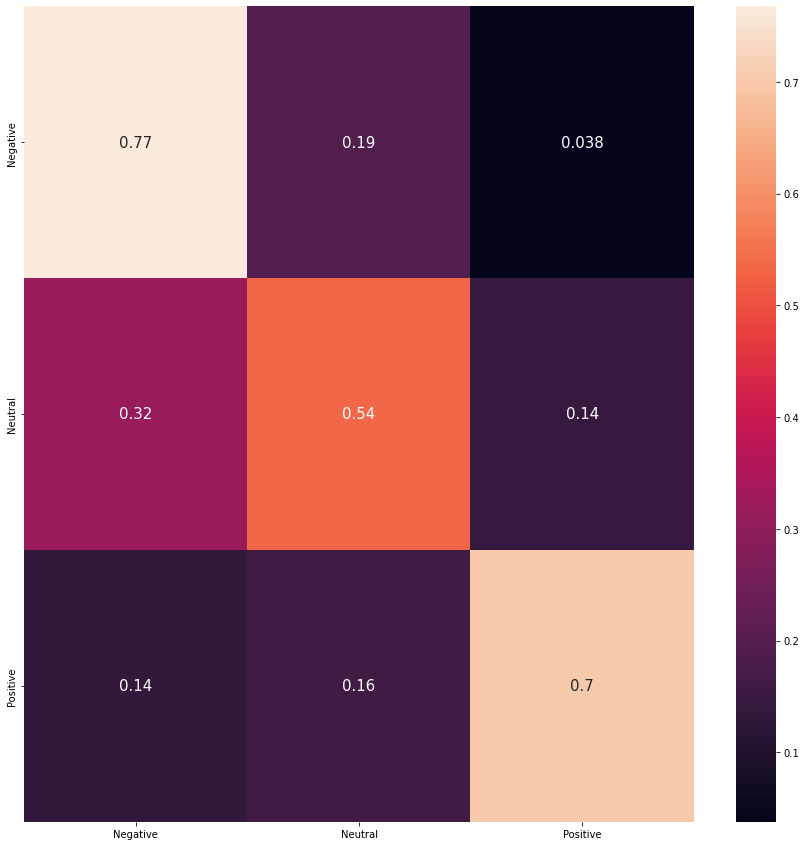

In [ ]:
import seaborn as sns
conf_matrix = pd.DataFrame(matrix, index = ['Negative','Neutral','Positive'],columns = ['Negative','Neutral','Positive'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})
plt.show()

In [ ]:
y_test_n = y_test.argmax(axis=1)
y_pred_n = y_pred.argmax(axis=1)

In [ ]:
print(classification_report(y_test_n, y_pred_n))

              precision    recall  f1-score   support

           0       0.73      0.68      0.71     14972
           1       0.57      0.62      0.59     14971
           2       0.76      0.74      0.75     14971

    accuracy                           0.68     44914
   macro avg       0.69      0.68      0.68     44914
weighted avg       0.69      0.68      0.68     44914



#### Checking results with examples

In [137]:
sentiment = ['Negative','Neutral','Positive']

In [138]:
sequence = tokenizer.texts_to_sequences(['this experience has been the worst , want my money back'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model1.predict(test), decimals=0).argmax(axis=1)[0]]

'Negative'

In [141]:
sequence = tokenizer.texts_to_sequences(['this video game is the best ever'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model1.predict(test), decimals=0).argmax(axis=1)[0]]

'Positive'

In [143]:
sequence = tokenizer.texts_to_sequences(['i hate youtube ads, they are annoying'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model1.predict(test), decimals=0).argmax(axis=1)[0]]

'Negative'

In [144]:
sequence = tokenizer.texts_to_sequences(['it was ok'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model1.predict(test), decimals=0).argmax(axis=1)[0]]

'Neutral'

In [147]:
sequence = tokenizer.texts_to_sequences(['''i really disliked their previous 
  product but this time they managed to surprise me'''])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model1.predict(test), decimals=0).argmax(axis=1)[0]]

'Positive'

In [148]:
sequence = tokenizer.texts_to_sequences(['''the product doesnt work, 
  dont buy if you value your money'''])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model1.predict(test), decimals=0).argmax(axis=1)[0]]

'Negative'

In [150]:
sequence = tokenizer.texts_to_sequences(['''overall this experience was somewhat
  underwhelming'''])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model1.predict(test), decimals=0).argmax(axis=1)[0]]

'Neutral'